## Topic: 
Given the dataset, create an analytic report to answer three below questions. The report should include the 
introduction, describing the data, analysis and conclusions.
    1. How does blood pressure and cholesterol relate to each other?
    2. Do men tend to have higher blood pressure than women? What about cholesterol?
    3. What contribute to causing heart disease (age, cholesterol, blood pressure)? Is it the effect the same for both sex (male and female)?
    
# Analytic Report

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

%matplotlib inline
sns.set()

pd.set_option('display.max_columns', None)

## Load Data

In [28]:
cardiology = pd.ExcelFile('Cardiology.xls')
print(cardiology.sheet_names)

['Sheet1', 'Sheet2', 'Sheet3']


In [29]:
df1 = cardiology.parse('Sheet1', skiprows=[1, 2])
print(df1.tail())

     age  sex  chest pain type  blood pressure  cholesterol  \
298   48    1                3             124          255   
299   57    1                4             132          207   
300   49    1                3             118          149   
301   74    0                2             120          269   
302   54    0                3             160          201   

     Fasting blood sugar <120  resting ecg  maximum heart rate  angina  peak  \
298                         1            0                 175       0   0.0   
299                         0            0                 168       1   0.0   
300                         0            2                 126       0   0.8   
301                         0            2                 121       1   0.2   
302                         0            0                 163       0   0.0   

     slope  #colored vessels  thal  class  
298      1                 2     3      1  
299      1                 0     7      1  
300     

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                         303 non-null int64
sex                         303 non-null int64
chest pain type             303 non-null int64
blood pressure              303 non-null int64
cholesterol                 303 non-null int64
Fasting blood sugar <120    303 non-null int64
resting ecg                 303 non-null int64
maximum heart rate          303 non-null int64
angina                      303 non-null int64
peak                        303 non-null float64
slope                       303 non-null int64
#colored vessels            303 non-null int64
thal                        303 non-null int64
class                       303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Question 1: How does blood pressure and cholesterol relate to each other?

In [5]:
print('The correlation between blood pressure and cholesterol is', df1['cholesterol'].corr(df1['blood pressure']), 'which is low')

The correlation between blood pressure and cholesterol is 0.12317420653239075 which is low


You can see more clearly through following scatter plot

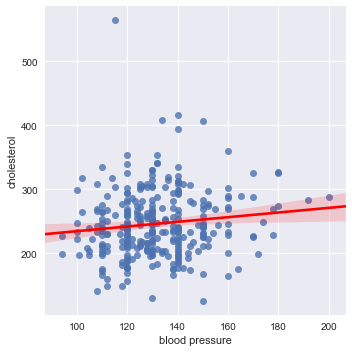

In [9]:
sns.lmplot(x='blood pressure', y='cholesterol', data=df1, line_kws={'color': 'red'})

## Question 2: Do men tend to have higher blood pressure than women? What about cholesterol?

Firstly, look at Blood pressure and Cholesterol distribution between Female and Male to make some initial predictions

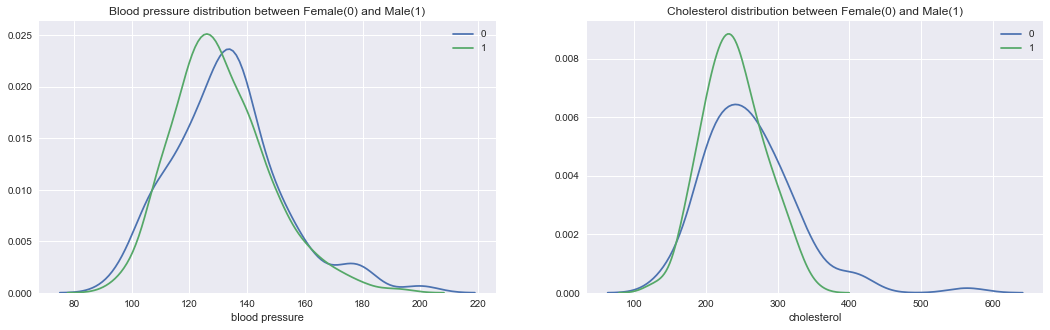

In [30]:
values_sex = np.unique(df1['sex'].values)
plt.figure(figsize=(18, 5))

plt.subplot(121)
for value_sex in values_sex:
    sns.distplot(df1.loc[df1.sex==value_sex, 'blood pressure'], hist=False, label=value_sex).set_title('Blood pressure distribution between Female(0) and Male(1)')

    
plt.subplot(122)
for value_sex in values_sex:
    sns.distplot(df1.loc[df1.sex==value_sex, 'cholesterol'], hist=False, label=value_sex).set_title('Cholesterol distribution between Female(0) and Male(1)')
plt.show()

### a. Blood Pressure:  
* **Null Hypothesis**: Men don't tend to have higher blood pressure than women  
* **Alternative Hypothesis**: Men tend to have higher blood pressure than women

In [13]:
female = df1[df1.sex==0]
male = df1[df1.sex==1]

ttest_ind(male['blood pressure'], female['blood pressure'])

Ttest_indResult(statistic=-0.986493153620836, pvalue=0.3246834797221041)

p-value $\approx  0.325 > 0.05\Rightarrow$ Non-significant evidence against null hypothesis.

### b. Cholesterol
* **Null Hypothesis**: Men don't tend to have higher cholesterol than women  
* **Alternative Hypothesis**: Men tend to have higher cholesterol than women

In [15]:
female = df1[df1.sex==0]
male = df1[df1.sex==1]

ttest_ind(male['cholesterol'], female['cholesterol'])

Ttest_indResult(statistic=-3.5029368327219244, pvalue=0.000529966610622664)

p-value $\approx 0.0005 < 0.05\Rightarrow$ Highly significant evidence against null hypothesis

In [68]:
ttest_ind(male['age'], female['age'])

Ttest_indResult(statistic=-1.7163220353587778, pvalue=0.08713196071826866)

## Question 3: What contribute to causing heart disease (age, cholesterol, blood pressure)? Is it the effect the same for both sex (male and female)?
Firstly, look at age, cholesterol, blood pressure distribution between Female and Male to make some initial predictions

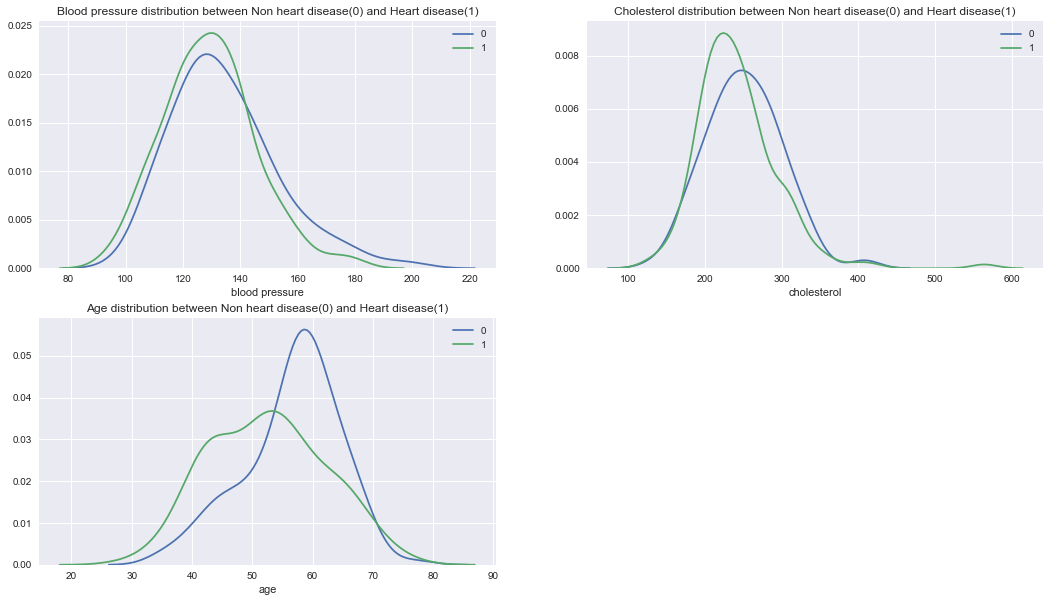

In [60]:
values_class = np.unique(df1['class'].values)
plt.figure(figsize=(18, 10))

plt.subplot(221)
for value_class in values_class:
    sns.distplot(df1.loc[df1['class']==value_class, 'blood pressure'], hist=False, label=value_class).set_title('Blood pressure distribution between Non heart disease(0) and Heart disease(1)')

plt.subplot(222)
for value_class in values_class:
    sns.distplot(df1.loc[df1['class']==value_class, 'cholesterol'], hist=False, label=value_class).set_title('Cholesterol distribution between Non heart disease(0) and Heart disease(1)')

plt.subplot(223)
for value_class in values_class:
    sns.distplot(df1.loc[df1['class']==value_class, 'age'], hist=False, label=value_class).set_title('Age distribution between Non heart disease(0) and Heart disease(1)')
plt.show()

In [62]:
heart_disease = df1[df1['class']==1]
non_heart_disease = df1[df1['class']==0]

ttest_ind(heart_disease['blood pressure'], non_heart_disease['blood pressure'])

Ttest_indResult(statistic=-2.5412927171039, pvalue=0.011546059200233312)

In [88]:
ttest_ind(heart_disease['blood pressure'], non_heart_disease['blood pressure'])

Ttest_indResult(statistic=-2.5412927171039, pvalue=0.011546059200233312)

In [87]:
ttest_ind(heart_disease['cholesterol'], non_heart_disease['cholesterol'])

Ttest_indResult(statistic=-1.4842450762526977, pvalue=0.13879032695600638)

In [85]:
ttest_ind(heart_disease['age'], non_heart_disease['age'])

Ttest_indResult(statistic=-4.014560975148874, pvalue=7.524801303442373e-05)

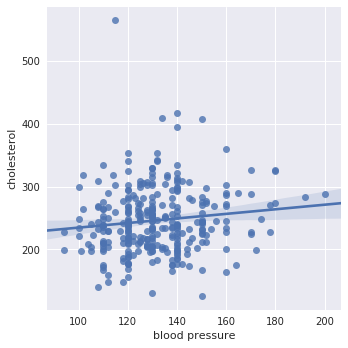

In [65]:
sns.lmplot(x='blood pressure', y='cholesterol', data=df1, scatter=True)

In [66]:
df1['cholesterol'].corr(df1['blood pressure'])

0.12317420653239074

In [57]:
?plt.subplot

Signature: plt.subplot(*args, **kwargs)
Docstring:
Return a subplot axes at the given grid position.

Call signature::

   subplot(nrows, ncols, index, **kwargs)

In the current figure, create and return an `~.Axes`, at position *index*
of a (virtual) grid of *nrows* by *ncols* axes.  Indexes go from 1 to
``nrows * ncols``, incrementing in row-major order.

If *nrows*, *ncols* and *index* are all less than 10, they can also be
given as a single, concatenated, three-digit number.

For example, ``subplot(2, 3, 3)`` and ``subplot(233)`` both create an
`~.Axes` at the top right corner of the current figure, occupying half of
the figure height and a third of the figure width.

.. note::

   Creating a subplot will delete any pre-existing subplot that overlaps
   with it beyond sharing a boundary::

      import matplotlib.pyplot as plt
      # plot a line, implicitly creating a subplot(111)
      plt.plot([1,2,3])
      # now create a subplot which represents the top plot of a grid
      # 